In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import allel
import statistics as stat
import statsmodels.stats.multitest as stats
import math

# TODO! COMPARE POS / BP COLUMNS IN INITIAL POPOOLATION + BAYPASS OUTPUTS WITH THE MAF ONE. 

In [2]:
new_address = r'D:\final_popoolation_results_resorted'
CHR = '21'
sync_Sparus_fst = pd.read_csv(rf'{new_address}/sync_Sp_aurata_LR5371{CHR}_popoolation.fst', sep="\t", header=None)
sync_Sparus_fet = pd.read_csv(rf'{new_address}/sync_Sp_aurata_LR5371{CHR}_popoolation.fet',  sep="\t", header=None)

In [3]:
sync_Sparus_fet

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,LR537121.1,24,1,1.0,143.0,1:2=0.27852946,1:3=1.16094451,1:4=0.67167872,1:5=1.88861156,1:6=0.00000000,...,16:17=0.18313974,16:18=0.67218679,16:19=0.93207854,16:20=0.63127008,17:18=0.87713935,17:19=1.18337375,17:20=0.87035962,18:19=0.09833477,18:20=0.11784774,19:20=0.29565075
1,LR537121.1,45,1,1.0,240.0,1:2=9.16576065,1:3=5.24454396,1:4=0.00000000,1:5=5.90394302,1:6=4.75462468,...,16:17=0.47179000,16:18=4.79624072,16:19=0.14935856,16:20=0.11380153,17:18=6.01778742,17:19=0.60014505,17:20=0.71792141,18:19=3.38527658,18:20=4.45907810,19:20=0.00000000
2,LR537121.1,51,1,1.0,267.0,1:2=0.20318099,1:3=2.85285819,1:4=1.40302195,1:5=1.20052495,1:6=0.85611851,...,16:17=1.12260465,16:18=0.58870970,16:19=0.44725814,16:20=3.59663067,17:18=0.24996244,17:19=1.62690970,17:20=5.77014495,18:19=1.09468284,18:20=4.81858950,19:20=1.23817579
3,LR537121.1,55,1,1.0,295.0,1:2=1.51622291,1:3=1.81745749,1:4=0.41414165,1:5=0.31304650,1:6=0.20690369,...,16:17=0.68529833,16:18=1.66854371,16:19=3.37862106,16:20=1.21880462,17:18=0.33210849,17:19=1.38995983,17:20=0.10395699,18:19=0.75567131,18:20=0.27506252,19:20=1.33639396
4,LR537121.1,63,1,1.0,337.0,1:2=1.18545791,1:3=1.02368825,1:4=0.07386890,1:5=1.18028717,1:6=0.67307504,...,16:17=0.40370076,16:18=1.99697676,16:19=1.30185752,16:20=0.22612465,17:18=0.83739959,17:19=0.56510351,17:20=0.14213978,18:19=0.07145206,18:20=1.43007376,19:20=0.94363488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258591,LR537121.1,41028332,1,1.0,60.0,1:2=2.59544112,1:3=1.80460425,1:4=7.04216740,1:5=2.26984926,1:6=0.75210639,...,16:17=0.20773824,16:18=1.00377078,16:19=0.00000000,16:20=2.29977227,17:18=0.59428511,17:19=0.22234137,17:20=2.95085542,18:19=1.06371236,18:20=4.62409008,19:20=1.84822112
258592,LR537121.1,41028595,1,1.0,56.0,1:2=2.05273098,1:3=0.04880386,1:4=7.70799746,1:5=3.88351362,1:6=3.17214046,...,16:17=0.17916039,16:18=0.75029917,16:19=0.31956820,16:20=1.47236971,17:18=0.43933509,17:19=0.05321566,17:20=2.04849339,18:19=0.25702503,18:20=3.30942629,19:20=2.50942208
258593,LR537121.1,41028932,1,1.0,70.0,1:2=0.00000000,1:3=0.00000000,1:4=1.16826849,1:5=0.00000000,1:6=0.00000000,...,16:17=2.19091230,16:18=0.00000000,16:19=0.00000000,16:20=0.00000000,17:18=1.52905852,17:19=2.00853241,17:20=2.12799037,18:19=0.00000000,18:20=0.00000000,19:20=0.00000000
258594,LR537121.1,41029306,1,1.0,62.0,1:2=0.00000000,1:3=1.21978494,1:4=0.23437524,1:5=1.74578447,1:6=1.61030098,...,16:17=0.61896909,16:18=0.64311045,16:19=1.12309105,16:20=0.91025950,17:18=0.00000000,17:19=0.18425327,17:20=0.16346592,18:19=0.18182292,18:20=0.16137510,19:20=0.00000000


In [4]:
sync_Sparus_fst

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,LR537121.1,24,1,1.0,143.0,1:2=0.00089380,1:3=0.00421736,1:4=0.00112838,1:5=0.00548862,1:6=0.00050639,...,16:17=0.00061982,16:18=0.00209571,16:19=0.00374280,16:20=0.00085329,17:18=0.00283367,17:19=0.00484310,17:20=0.00221746,18:19=0.00051071,18:20=0.00064335,19:20=0.00145645
1,LR537121.1,45,1,1.0,240.0,1:2=0.01498929,1:3=0.00858369,1:4=0.00000000,1:5=0.00911854,1:6=0.00819672,...,16:17=0.00073691,16:18=0.00903799,16:19=0.00059833,16:20=0.00006657,17:18=0.01185278,17:19=0.00134385,17:20=0.00108951,18:19=0.00720576,18:20=0.00821243,19:20=0.00049532
2,LR537121.1,51,1,1.0,267.0,1:2=0.00045731,1:3=0.00578146,1:4=0.00163711,1:5=0.00195397,1:6=0.00182576,...,16:17=0.00185406,16:18=0.00089082,16:19=0.00075100,16:20=0.00414591,17:18=0.00023983,17:19=0.00357358,17:20=0.01067870,18:19=0.00220884,18:20=0.00817643,19:20=0.00246833
3,LR537121.1,55,1,1.0,295.0,1:2=0.00244662,1:3=0.00299643,1:4=0.00029602,1:5=0.00035577,1:6=0.00058983,...,16:17=0.00084328,16:18=0.00206026,16:19=0.00574415,16:20=0.00107060,17:18=0.00040099,17:19=0.00261901,17:20=0.00029872,18:19=0.00116889,18:20=0.00032009,19:20=0.00218261
4,LR537121.1,63,1,1.0,337.0,1:2=0.00182327,1:3=0.00147629,1:4=0.00001702,1:5=0.00153214,1:6=0.00116086,...,16:17=0.00048443,16:18=0.00247472,16:19=0.00215637,16:20=0.00009216,17:18=0.00102829,17:19=0.00079599,17:20=0.00028241,18:19=0.00019096,18:20=0.00173656,19:20=0.00150805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258591,LR537121.1,41028332,1,1.0,60.0,1:2=0.03779264,1:3=0.02578504,1:4=0.10762293,1:5=0.03416039,1:6=0.00862239,...,16:17=0.00199728,16:18=0.01419045,16:19=0.00095055,16:20=0.03136289,17:18=0.00665030,17:19=0.00221093,17:20=0.04374500,18:19=0.01496837,18:20=0.07758353,19:20=0.02868844
258592,LR537121.1,41028595,1,1.0,56.0,1:2=0.02814172,1:3=0.00026998,1:4=0.11934927,1:5=0.06543985,1:6=0.04542464,...,16:17=0.00141961,16:18=0.01092216,16:19=0.00245291,16:20=0.01965177,17:18=0.00551606,17:19=0.00075689,17:20=0.02890050,18:19=0.00373600,18:20=0.05598258,19:20=0.03488693
258593,LR537121.1,41028932,1,1.0,70.0,1:2=0.00000000,1:3=0.00000000,1:4=0.01786059,1:5=0.00000000,1:6=0.00000000,...,16:17=0.02777778,16:18=0.00000000,16:19=0.00000000,16:20=0.00000000,17:18=0.02837267,17:19=0.02777778,17:20=0.02777778,18:19=0.00000000,18:20=0.00000000,19:20=0.00000000
258594,LR537121.1,41029306,1,1.0,62.0,1:2=0.00160783,1:3=0.02320072,1:4=0.00339669,1:5=0.02262443,1:6=0.02262443,...,16:17=0.00877193,16:18=0.00925926,16:19=0.01734104,16:20=0.01645908,17:18=0.00024813,17:19=0.00369701,17:20=0.00259129,18:19=0.00320592,18:20=0.00257965,19:20=0.00177810


In [5]:
# focus on fst differences between the farmed and the wild populations
# pops1-10 are farmed; pops11-20 are wild

#populations 5 (80-89) and 8 (119-128) were missing 
indices = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
            32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
            49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
            80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
            94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
            107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149
            ]


sync_Sparus_fst_filtered = sync_Sparus_fst.iloc[:, indices]
sync_Sparus_fst_filtered

,14,15,16,17,18,19,20,21,22,23,...,140,141,142,143,144,145,146,147,148,149
0,1:11=0.00251023,1:12=0.00197719,1:13=0.00248904,1:14=0.00134409,1:15=0.00377253,1:16=0.00097185,1:17=0.00208739,1:18=0.00052170,1:19=0.00133677,1:20=0.00012338,...,10:11=0.03025170,10:12=0.03271803,10:13=0.03327858,10:14=0.03200796,10:15=0.03464722,10:16=0.03153924,10:17=0.03224733,10:18=0.02948000,10:19=0.02927318,10:20=0.03010002
1,1:11=0.00770925,1:12=0.00556310,1:13=0.00687158,1:14=0.00863313,1:15=0.00517476,1:16=0.00870294,1:17=0.01185278,1:18=0.00000000,1:19=0.00720576,1:20=0.00787710,...,10:11=0.03365861,10:12=0.02860630,10:13=0.03169229,10:14=0.03555218,10:15=0.02756325,10:16=0.03565145,10:17=0.04115157,10:18=0.00628931,10:19=0.03233124,10:20=0.03390312
2,1:11=0.00069855,1:12=0.00009024,1:13=0.00076834,1:14=0.00143238,1:15=0.00184180,1:16=0.00236388,1:17=0.00769815,1:18=0.00554998,1:19=0.00118608,1:20=0.00033584,...,10:11=0.03097584,10:12=0.03370730,10:13=0.03075522,10:14=0.04196056,10:15=0.02869703,10:16=0.02806036,10:17=0.02449584,10:18=0.02549318,10:19=0.03012715,10:20=0.03774931
3,1:11=0.00087995,1:12=0.00082810,1:13=0.01034483,1:14=0.00061542,1:15=0.00058100,1:16=0.00066098,1:17=0.00017611,1:18=0.00049252,1:19=0.00282158,1:20=0.00012628,...,10:11=0.02958148,10:12=0.02203580,10:13=0.01549053,10:14=0.02905554,10:15=0.02256627,10:16=0.02239210,10:17=0.02546568,10:18=0.02821175,10:19=0.03342293,10:20=0.02661425
4,1:11=0.00046745,1:12=0.00007367,1:13=0.00057522,1:14=0.00031028,1:15=0.00011155,1:16=0.00008336,1:17=0.00026590,1:18=0.00185819,1:19=0.00160664,1:20=0.00006361,...,10:11=0.03291029,10:12=0.03013051,10:13=0.03346172,10:14=0.02913704,10:15=0.02985414,10:16=0.03138966,10:17=0.02950253,10:18=0.02746608,10:19=0.02759243,10:20=0.03046111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258591,1:11=0.05135056,1:12=0.00905013,1:13=0.00085609,1:14=0.00409519,1:15=0.00950036,1:16=0.02229433,1:17=0.01240376,1:18=0.00161009,1:19=0.02351449,1:20=0.09445088,...,10:11=0.11523546,10:12=0.06051839,10:13=0.04312899,10:14=0.03211580,10:15=0.06109821,10:16=0.07970706,10:17=0.06590136,10:18=0.04419352,10:19=0.08168760,10:20=0.16101727
258592,1:11=0.05520282,1:12=0.00347458,1:13=0.00048159,1:14=0.01039636,1:15=0.00560630,1:16=0.00658547,1:17=0.00327106,1:18=0.00180344,1:19=0.00130654,1:20=0.04726579,...,10:11=0.10969440,10:12=0.04090617,10:13=0.03541694,10:14=0.03332061,10:15=0.04846204,10:16=0.05009764,10:17=0.04283595,10:18=0.03221847,10:19=0.03973210,10:20=0.10090437
258593,1:11=0.00000000,1:12=0.00000000,1:13=0.01806050,1:14=0.00000000,1:15=0.02164502,1:16=0.00000000,1:17=0.02777778,1:18=0.00000000,1:19=0.00000000,1:20=0.00000000,...,10:11=0.00000000,10:12=0.00000000,10:13=0.08095680,10:14=0.00000000,10:15=0.08387344,10:16=0.00000000,10:17=0.08912516,10:18=0.00000000,10:19=0.00000000,10:20=0.00000000
258594,1:11=0.00376762,1:12=0.00534365,1:13=0.00094285,1:14=0.00102366,1:15=0.02286243,1:16=0.02262443,1:17=0.00608122,1:18=0.00575949,1:19=0.00211040,1:20=0.00159831,...,10:11=0.09941061,10:12=0.07338644,10:13=0.08674893,10:14=0.08132853,10:15=0.00000000,10:16=0.00000000,10:17=0.07334826,10:18=0.07335641,10:19=0.07888002,10:20=0.08080564


In [7]:
import pandas as pd
import numpy as np

# Extract FST values directly from DataFrame without looping through each row manually
# Split each string at '=' and expand to new DataFrame, then select the second column containing the values
fst_values = sync_Sparus_fst_filtered.map(lambda x: float(x.split('=')[1]))

# Calculate mean across columns for each row, this provides the average FST per SNP per comparison
avg_FST_perSNP_Sparus = fst_values.mean(axis=1)

# Optional: Print indices at intervals
for index in range(0, len(avg_FST_perSNP_Sparus), 10000):
    print(index, end=" ")

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 

In [8]:
dfex = pd.DataFrame(avg_FST_perSNP_Sparus)

In [9]:
sync_Sparus_fst_df = pd.DataFrame(avg_FST_perSNP_Sparus, columns=["Fst"])
sync_Sparus_fst_df['index1'] = sync_Sparus_fst_df.index
pos = sync_Sparus_fst[1]
sync_Sparus_fst_df[1] = pos
sync_Sparus_fst_df[0] = CHR
sync_Sparus_fst_df

,Fst,index1,1,0
0,0.009029,0,24,21
1,0.011142,1,45,21
2,0.007816,2,51,21
3,0.007468,3,55,21
4,0.006778,4,63,21
...,...,...,...,...
258591,0.043830,258591,41028332,21
258592,0.047128,258592,41028595,21
258593,0.012518,258593,41028932,21
258594,0.022420,258594,41029306,21


In [11]:
# focus on fet differences between the farmed and the wild populations
# pops1-10 are farmed; pops11-20 are wild

#populations 5 (80-89) and 8 (119-128) were missing 
indices = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
            32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
            49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
            80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
            94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
            107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149
            ]



sync_Sparus_fet_filtered = sync_Sparus_fet.iloc[:, indices]
sync_Sparus_fet_filtered

,14,15,16,17,18,19,20,21,22,23,...,140,141,142,143,144,145,146,147,148,149
0,1:11=0.86958222,1:12=0.99202417,1:13=1.20402229,1:14=0.74837483,1:15=1.67253917,1:16=0.55461449,1:17=0.82785539,1:18=0.07901150,1:19=0.30668743,1:20=0.00000000,...,10:11=0.96981859,10:12=0.05092082,10:13=0.10586393,10:14=0.00000000,10:15=0.23056878,10:16=0.05245769,10:17=0.05373466,10:18=0.38967197,10:19=0.53111376,10:20=0.35367978
1,1:11=5.15936763,1:12=4.06821063,1:13=5.04008636,1:14=6.38995347,1:15=3.77427011,1:16=6.26231017,1:17=7.60616902,1:18=0.00000000,1:19=4.21834491,1:20=5.86713179,...,10:11=0.00000000,10:12=0.13020074,10:13=0.00000000,10:14=0.10444790,10:15=0.13733587,10:16=0.10412499,10:17=0.35510098,10:18=1.98899160,10:19=0.00000000,10:20=0.00000000
2,1:11=0.56929582,1:12=0.12593621,1:13=0.79582367,1:14=1.27761583,1:15=1.62924508,1:16=2.06013750,1:17=4.04399997,1:18=3.24328858,1:19=0.58838824,1:20=0.39205377,...,10:11=0.00000000,10:12=0.18218479,10:13=0.00000000,10:14=1.14647216,10:15=0.21204894,10:16=0.30798162,10:17=1.04685464,10:18=0.77733149,10:19=0.00000000,10:20=0.65222142
3,1:11=0.71348978,1:12=0.89823070,1:13=10.59706212,1:14=0.69565680,1:15=0.66538041,1:16=0.76922445,1:17=0.00000000,1:18=0.45838536,1:19=1.73406698,1:20=0.14378997,...,10:11=0.07159244,10:12=1.40165742,10:13=7.74735927,10:14=0.07154307,10:15=1.10218088,10:16=1.32237563,10:17=0.42804174,10:18=0.16273173,10:19=0.14716858,10:20=0.38807100
4,1:11=0.51209736,1:12=0.12420712,1:13=0.71668827,1:14=0.48259399,1:15=0.18396216,1:16=0.14933862,1:17=0.18284451,1:18=1.52852673,1:19=0.99272926,1:20=0.04531174,...,10:11=0.29286514,10:12=0.00000000,10:13=0.39129429,10:14=0.19213125,10:15=0.04125782,10:16=0.08258063,10:17=0.04379664,10:18=0.61562269,10:19=0.44986031,10:20=0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258591,1:11=3.38525030,1:12=0.77650997,1:13=0.11576486,1:14=0.42252560,1:15=0.80160551,1:16=1.69229228,1:17=0.92899438,1:18=0.19108736,1:19=1.63131531,1:20=5.85570112,...,10:11=4.85449987,10:12=1.84794467,10:13=0.88757641,10:14=0.13065952,10:15=1.70625011,10:16=2.95710607,10:17=2.11632518,10:18=0.92610124,10:19=2.81426773,10:20=7.40576849
258592,1:11=3.79779483,1:12=0.25259124,1:13=0.00000000,1:14=0.89746503,1:15=0.54429643,1:16=0.66411383,1:17=0.31709685,1:18=0.05306122,1:19=0.16668333,1:20=3.24241015,...,10:11=4.51476965,10:12=0.72665459,10:13=0.42938044,10:14=0.11437770,10:15=1.20000374,10:16=1.24811389,10:17=0.82695269,10:18=0.28237112,10:19=0.67685020,10:20=4.05845046
258593,1:11=0.00000000,1:12=0.00000000,1:13=1.17664049,1:14=0.00000000,1:15=1.58791927,1:16=0.00000000,1:17=1.99739605,1:18=0.00000000,1:19=0.00000000,1:20=0.00000000,...,10:11=0.00000000,10:12=0.00000000,10:13=0.48348420,10:14=0.00000000,10:15=0.79811600,10:16=0.00000000,10:17=1.07964605,10:18=0.00000000,10:19=0.00000000,10:20=0.00000000
258594,1:11=0.22688647,1:12=0.33643495,1:13=0.00000000,1:14=0.12916097,1:15=1.22318293,1:16=1.58215950,1:17=0.55562346,1:18=0.35052045,1:19=0.00000000,1:20=0.13204813,...,10:11=1.44360372,10:12=0.28660765,10:13=0.74233431,10:14=0.52145961,10:15=0.00000000,10:16=0.00000000,10:17=0.26580486,10:18=0.27160294,10:19=0.57243112,10:20=0.51507410


In [12]:
# CORRECT FOR MULTIPLE TESTING WITH THE BH METHOD

# the "for" loop of above, which estimates the AVERAGE -LOG(P-val) per row
# modified to correct for multiple test

AVERAGE_FET_per_SNP_Sparus_BHcor = []
dropped_indices = []

for row in range(len(sync_Sparus_fet_filtered)):
    FET_values_per_SNP = []
    if row%10000 == 0:
        print(row, end=" ")
    try:
        for element in range(len(list(sync_Sparus_fet_filtered.iloc[row,:]))):
            num_ = round(float(sync_Sparus_fet_filtered.iloc[row,element].split("=")[1]), 3)
            num_ = 10**(-num_)  # convert num_ from log10(p-value) to p-value
            FET_values_per_SNP.append(num_)
        # run the multiple correction
        FET_values_per_SNP_cor = stats.multipletests(FET_values_per_SNP, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
        # convert the corrected values back to log10
        FET_values_per_SNP_cor = [-math.log10(x) for x in list(FET_values_per_SNP_cor)]
        row_mean_cor = stat.mean(FET_values_per_SNP_cor)
        AVERAGE_FET_per_SNP_Sparus_BHcor.append(row_mean_cor)
    except ValueError:
        dropped_indices.append(row)
        pass

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 

In [13]:
len(dropped_indices)

0

In [14]:
dropped_indices

[]

In [ ]:
sync_Sparus_fet_filtered = sync_Sparus_fet_filtered.drop(index = dropped_indices)
sync_Sparus_fst_df = sync_Sparus_fst_df.drop(index = dropped_indices)

In [15]:
# make certain to round the resulted averages to 3 decimals
AVERAGE_FET_per_SNP_Sparus_BHcor = [round(x, 3) for x in AVERAGE_FET_per_SNP_Sparus_BHcor]

# add averages as new column to the "sync_Sparus_fet_filtered" df
sync_Sparus_fet_filtered["AVERAGE_SIGN_BHcor"] = AVERAGE_FET_per_SNP_Sparus_BHcor

C:\Users\mitsi\AppData\Local\Temp\ipykernel_20464\3676271577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sync_Sparus_fet_filtered["AVERAGE_SIGN_BHcor"] = AVERAGE_FET_per_SNP_Sparus_BHcor


In [17]:
len(AVERAGE_FET_per_SNP_Sparus_BHcor)

258596

In [18]:
sync_Sparus_fet_filtered

,14,15,16,17,18,19,20,21,22,23,...,141,142,143,144,145,146,147,148,149,AVERAGE_SIGN_BHcor
0,1:11=0.86958222,1:12=0.99202417,1:13=1.20402229,1:14=0.74837483,1:15=1.67253917,1:16=0.55461449,1:17=0.82785539,1:18=0.07901150,1:19=0.30668743,1:20=0.00000000,...,10:12=0.05092082,10:13=0.10586393,10:14=0.00000000,10:15=0.23056878,10:16=0.05245769,10:17=0.05373466,10:18=0.38967197,10:19=0.53111376,10:20=0.35367978,0.576
1,1:11=5.15936763,1:12=4.06821063,1:13=5.04008636,1:14=6.38995347,1:15=3.77427011,1:16=6.26231017,1:17=7.60616902,1:18=0.00000000,1:19=4.21834491,1:20=5.86713179,...,10:12=0.13020074,10:13=0.00000000,10:14=0.10444790,10:15=0.13733587,10:16=0.10412499,10:17=0.35510098,10:18=1.98899160,10:19=0.00000000,10:20=0.00000000,1.414
2,1:11=0.56929582,1:12=0.12593621,1:13=0.79582367,1:14=1.27761583,1:15=1.62924508,1:16=2.06013750,1:17=4.04399997,1:18=3.24328858,1:19=0.58838824,1:20=0.39205377,...,10:12=0.18218479,10:13=0.00000000,10:14=1.14647216,10:15=0.21204894,10:16=0.30798162,10:17=1.04685464,10:18=0.77733149,10:19=0.00000000,10:20=0.65222142,1.067
3,1:11=0.71348978,1:12=0.89823070,1:13=10.59706212,1:14=0.69565680,1:15=0.66538041,1:16=0.76922445,1:17=0.00000000,1:18=0.45838536,1:19=1.73406698,1:20=0.14378997,...,10:12=1.40165742,10:13=7.74735927,10:14=0.07154307,10:15=1.10218088,10:16=1.32237563,10:17=0.42804174,10:18=0.16273173,10:19=0.14716858,10:20=0.38807100,1.398
4,1:11=0.51209736,1:12=0.12420712,1:13=0.71668827,1:14=0.48259399,1:15=0.18396216,1:16=0.14933862,1:17=0.18284451,1:18=1.52852673,1:19=0.99272926,1:20=0.04531174,...,10:12=0.00000000,10:13=0.39129429,10:14=0.19213125,10:15=0.04125782,10:16=0.08258063,10:17=0.04379664,10:18=0.61562269,10:19=0.44986031,10:20=0.00000000,0.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258591,1:11=3.38525030,1:12=0.77650997,1:13=0.11576486,1:14=0.42252560,1:15=0.80160551,1:16=1.69229228,1:17=0.92899438,1:18=0.19108736,1:19=1.63131531,1:20=5.85570112,...,10:12=1.84794467,10:13=0.88757641,10:14=0.13065952,10:15=1.70625011,10:16=2.95710607,10:17=2.11632518,10:18=0.92610124,10:19=2.81426773,10:20=7.40576849,1.968
258592,1:11=3.79779483,1:12=0.25259124,1:13=0.00000000,1:14=0.89746503,1:15=0.54429643,1:16=0.66411383,1:17=0.31709685,1:18=0.05306122,1:19=0.16668333,1:20=3.24241015,...,10:12=0.72665459,10:13=0.42938044,10:14=0.11437770,10:15=1.20000374,10:16=1.24811389,10:17=0.82695269,10:18=0.28237112,10:19=0.67685020,10:20=4.05845046,2.084
258593,1:11=0.00000000,1:12=0.00000000,1:13=1.17664049,1:14=0.00000000,1:15=1.58791927,1:16=0.00000000,1:17=1.99739605,1:18=0.00000000,1:19=0.00000000,1:20=0.00000000,...,10:12=0.00000000,10:13=0.48348420,10:14=0.00000000,10:15=0.79811600,10:16=0.00000000,10:17=1.07964605,10:18=0.00000000,10:19=0.00000000,10:20=0.00000000,0.280
258594,1:11=0.22688647,1:12=0.33643495,1:13=0.00000000,1:14=0.12916097,1:15=1.22318293,1:16=1.58215950,1:17=0.55562346,1:18=0.35052045,1:19=0.00000000,1:20=0.13204813,...,10:12=0.28660765,10:13=0.74233431,10:14=0.52145961,10:15=0.00000000,10:16=0.00000000,10:17=0.26580486,10:18=0.27160294,10:19=0.57243112,10:20=0.51507410,0.306


In [ ]:
sync_Sparus_fet_filtered

In [19]:
sync_Sparus_fst_df ['FET_AVG_BHcor'] = sync_Sparus_fet_filtered["AVERAGE_SIGN_BHcor"]
sync_Sparus_fst_df

,Fst,index1,1,0,FET_AVG_BHcor
0,0.009029,0,24,21,0.576
1,0.011142,1,45,21,1.414
2,0.007816,2,51,21,1.067
3,0.007468,3,55,21,1.398
4,0.006778,4,63,21,0.340
...,...,...,...,...,...
258591,0.043830,258591,41028332,21,1.968
258592,0.047128,258592,41028595,21,2.084
258593,0.012518,258593,41028932,21,0.280
258594,0.022420,258594,41029306,21,0.306


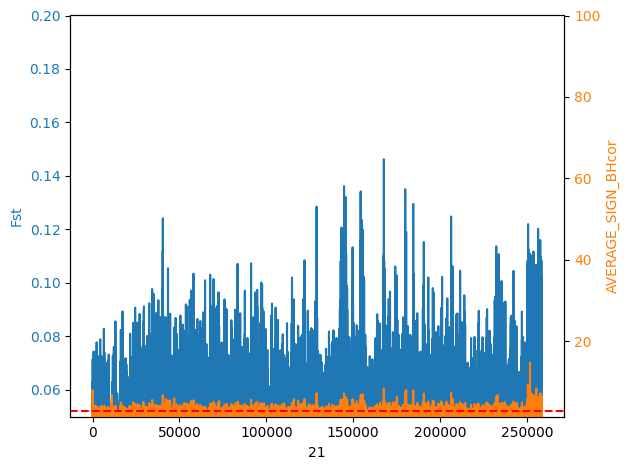

<Figure size 2000x2000 with 0 Axes>

In [20]:
data1 = sync_Sparus_fst_df["Fst"]
data2 = sync_Sparus_fst_df["FET_AVG_BHcor"]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel(str(CHR) )
ax1.set_ylabel('Fst', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0.05 , 0.2)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('AVERAGE_SIGN_BHcor', color=color) 
ax2.plot(data2, color=color)
plt.axhline(3, color = 'red',linestyle='dashed' )
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(1.5, 100)

plt.figure(figsize=(20, 20))
fig.tight_layout() 
plt.savefig(rf'Sparus_popoolation_plot_LR5371{CHR}')
plt.show()

In [21]:
sync_Sparus_fst_df.to_csv(rf"LR5371{CHR}_Sparus_popoolation_result.csv", header=True, index=False, sep=",")

# -------------------------------- OLD RUN -------------------------------------------------

In [140]:
CHR = '21'
sync_Sparus_fst = pd.read_csv(rf'sync_Sp_aurata_LR5371{CHR}_popoolation.fst', sep="\t", header=None)
sync_Sparus_fet = pd.read_csv(rf'sync_Sp_aurata_LR5371{CHR}_popoolation.fet',  sep="\t", header=None)

# sync_Sparus_fst = pd.read_csv(r"C:\Users\arist\Downloads\sync_Sp_aurata_LR5371" + str(CHR) + "_popoolation.fst", sep="\t", header=None)
# sync_Sparus_fet = pd.read_csv(r"C:\Users\arist\Downloads\sync_Sp_aurata_LR5371" + str(CHR) + "_popoolation.fet", sep="\t", header=None, low_memory=False)

In [184]:
sync_Sparus_fet

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,LR537121.1,10000758,1,1.0,60.0,1:2=2.80617164,1:3=1.38643996,1:4=0.38405044,1:5=3.87380178,1:6=1.43062573,...,16:17=3.27017367,16:18=0.39400282,16:19=0.41099658,16:20=0.04312538,17:18=1.92389842,17:19=1.70308232,17:20=2.89945281,18:19=0.00000000,18:20=0.27138125,19:20=0.35010503
1,LR537121.1,10000810,1,1.0,55.0,1:2=0.30277766,1:3=0.94119664,1:4=0.00000000,1:5=0.91366135,1:6=1.35775100,...,16:17=0.68929022,16:18=0.65943834,16:19=1.07225375,16:20=0.00000000,17:18=0.00000000,17:19=0.16931447,17:20=0.63605561,18:19=0.17470923,18:20=0.60778703,19:20=0.99043040
2,LR537121.1,10001732,1,1.0,57.0,1:2=1.31392588,1:3=1.22125274,1:4=0.91256053,1:5=0.91097748,1:6=0.89548559,...,16:17=0.61313361,16:18=1.04178380,16:19=0.00000000,16:20=0.73213649,17:18=2.30833969,17:19=0.70137607,17:20=0.00000000,18:19=0.75727830,18:20=2.74449580,19:20=0.83079057
3,LR537121.1,10002181,1,1.0,61.0,1:2=15.77546280,1:3=14.46554664,1:4=13.03680745,1:5=3.44844238,1:6=1.98903241,...,16:17=0.00000000,16:18=0.09149215,16:19=0.36395000,16:20=0.04507644,17:18=0.09176999,17:19=0.36549690,17:20=0.00000000,18:19=0.52509397,18:20=0.04482061,19:20=0.45436231
4,LR537121.1,10002197,1,1.0,55.0,1:2=4.14693168,1:3=0.00000000,1:4=0.00000000,1:5=0.00000000,1:6=0.00000000,...,16:17=0.00000000,16:18=0.92792708,16:19=1.44083741,16:20=1.90316932,17:18=0.91805661,17:19=1.42626948,17:20=1.88308537,18:19=0.15281441,18:20=0.48093184,19:20=0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158315,LR537121.1,41028332,1,1.0,60.0,1:2=2.59544112,1:3=1.80460425,1:4=7.04216740,1:5=2.26984926,1:6=0.75210639,...,16:17=0.20773824,16:18=1.00377078,16:19=0.00000000,16:20=2.29977227,17:18=0.59428511,17:19=0.22234137,17:20=2.95085542,18:19=1.06371236,18:20=4.62409008,19:20=1.84822112
158316,LR537121.1,41028595,1,1.0,56.0,1:2=2.05273098,1:3=0.04880386,1:4=7.70799746,1:5=3.88351362,1:6=3.17214046,...,16:17=0.17916039,16:18=0.75029917,16:19=0.31956820,16:20=1.47236971,17:18=0.43933509,17:19=0.05321566,17:20=2.04849339,18:19=0.25702503,18:20=3.30942629,19:20=2.50942208
158317,LR537121.1,41028932,1,1.0,70.0,1:2=0.00000000,1:3=0.00000000,1:4=1.16826849,1:5=0.00000000,1:6=0.00000000,...,16:17=2.19091230,16:18=0.00000000,16:19=0.00000000,16:20=0.00000000,17:18=1.52905852,17:19=2.00853241,17:20=2.12799037,18:19=0.00000000,18:20=0.00000000,19:20=0.00000000
158318,LR537121.1,41029306,7,7.0,57.7,1:2=3.67973125,1:3=10.62957309,1:4=2.46406592,1:5=29.41313110,1:6=10.87548519,...,16:17=5.57782356,16:18=1.04940410,16:19=12.23866304,16:20=15.50249680,17:18=5.32361473,17:19=5.95068070,17:20=8.12039755,18:19=11.15962988,18:20=15.38492772,19:20=7.09817413


In [185]:
sync_Sparus_fst

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,LR537121.1,10000758,1,1.0,60.0,1:2=0.03387342,1:3=0.01407434,1:4=0.00315809,1:5=0.04879999,1:6=0.01783223,...,16:17=0.04072197,16:18=0.00307959,16:19=0.00436857,16:20=0.00054584,17:18=0.02348719,17:19=0.02143951,17:20=0.03791552,18:19=0.00045614,18:20=0.00184171,19:20=0.00299803
1,LR537121.1,10000810,1,1.0,55.0,1:2=0.00806452,1:3=0.01276596,1:4=0.00000000,1:5=0.01224490,1:6=0.01904762,...,16:17=0.00943396,16:18=0.00884956,16:19=0.01492537,16:20=0.00000000,17:18=0.00029898,17:19=0.00140465,17:20=0.00943396,18:19=0.00192720,18:20=0.00884956,19:20=0.01492537
2,LR537121.1,10001732,1,1.0,57.0,1:2=0.01587302,1:3=0.01587302,1:4=0.01618802,1:5=0.01638962,1:6=0.01730802,...,16:17=0.01030928,16:18=0.01741810,16:19=0.00118932,16:20=0.01030928,17:18=0.04000000,17:19=0.01250000,17:20=0.00000000,18:19=0.01515244,18:20=0.04000000,19:20=0.01250000
3,LR537121.1,10002181,1,1.0,61.0,1:2=0.22618987,1:3=0.21091154,1:4=0.20741238,1:5=0.04880952,1:6=0.02555057,...,16:17=0.00005559,16:18=0.00040292,16:19=0.00440705,16:20=0.00045557,17:18=0.00044017,17:19=0.00441427,17:20=0.00039176,18:19=0.00665734,18:20=0.00059427,19:20=0.00497766
4,LR537121.1,10002197,1,1.0,55.0,1:2=0.04561404,1:3=0.00000000,1:4=0.00000000,1:5=0.00000000,1:6=0.00000000,...,16:17=0.00000000,16:18=0.01158301,16:19=0.01923077,16:20=0.02400000,17:18=0.01158301,17:19=0.01923077,17:20=0.02400000,18:19=0.00256191,18:20=0.00432744,19:20=0.00141644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158315,LR537121.1,41028332,1,1.0,60.0,1:2=0.03779264,1:3=0.02578504,1:4=0.10762293,1:5=0.03416039,1:6=0.00862239,...,16:17=0.00199728,16:18=0.01419045,16:19=0.00095055,16:20=0.03136289,17:18=0.00665030,17:19=0.00221093,17:20=0.04374500,18:19=0.01496837,18:20=0.07758353,19:20=0.02868844
158316,LR537121.1,41028595,1,1.0,56.0,1:2=0.02814172,1:3=0.00026998,1:4=0.11934927,1:5=0.06543985,1:6=0.04542464,...,16:17=0.00141961,16:18=0.01092216,16:19=0.00245291,16:20=0.01965177,17:18=0.00551606,17:19=0.00075689,17:20=0.02890050,18:19=0.00373600,18:20=0.05598258,19:20=0.03488693
158317,LR537121.1,41028932,1,1.0,70.0,1:2=0.00000000,1:3=0.00000000,1:4=0.01786059,1:5=0.00000000,1:6=0.00000000,...,16:17=0.02777778,16:18=0.00000000,16:19=0.00000000,16:20=0.00000000,17:18=0.02837267,17:19=0.02777778,17:20=0.02777778,18:19=0.00000000,18:20=0.00000000,19:20=0.00000000
158318,LR537121.1,41029306,7,7.0,57.7,1:2=0.00780104,1:3=0.07741965,1:4=0.00523445,1:5=0.05162712,1:6=0.04244699,...,16:17=0.00807205,16:18=0.00187688,16:19=0.04071133,16:20=0.02329591,17:18=0.00819508,17:19=0.02104819,17:20=0.01569783,18:19=0.03429951,18:20=0.02773409,19:20=0.04109939


In [ ]:
sync_Sparus_fst.iloc[:, 128]



0         8:20=0.01232826
1         8:20=0.00917431
2         8:20=0.00000000
3         8:20=0.02137195
4         8:20=0.03420014
               ...       
158315    8:20=0.14258316
158316    8:20=0.21071646
158317    8:20=0.00000000
158318    8:20=0.09506981
158319    8:20=0.03566816
Name: 128, Length: 158320, dtype: object

In [ ]:
# focus on fst differences between the farmed and the wild populations
# pops1-10 are farmed; pops11-20 are wild

#populations 5 (80-89) and 8 (119-128) were missing 
indices = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
            32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
            49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
            80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
            94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
            107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149
            ]


sync_Sparus_fst_filtered = sync_Sparus_fst.iloc[:, indices]
sync_Sparus_fst_filtered

,14,15,16,17,18,19,20,21,22,23
0,1:11=0.00058082,1:12=0.01485587,1:13=0.00331160,1:14=0.02272517,1:15=0.00090935,1:16=0.00354311,1:17=0.06687143,1:18=0.01247014,1:19=0.01469400,1:20=0.00502556
1,1:11=0.00805781,1:12=0.00000000,1:13=0.00000000,1:14=0.01369863,1:15=0.00990099,1:16=0.00000000,1:17=0.00943396,1:18=0.00884956,1:19=0.01492537,1:20=0.00000000
2,1:11=0.01834951,1:12=0.01587302,1:13=0.01652971,1:14=0.01587302,1:15=0.01757042,1:16=0.00261793,1:17=0.01804274,1:18=0.01114063,1:19=0.00293919,1:20=0.01587302
3,1:11=0.14525134,1:12=0.07355956,1:13=0.06172677,1:14=0.07673022,1:15=0.15931751,1:16=0.14020172,1:17=0.14061788,1:18=0.15173602,1:19=0.10444460,1:20=0.14601762
4,1:11=0.05132876,1:12=0.01661130,1:13=0.00746269,1:14=0.00000000,1:15=0.00826446,1:16=0.00000000,1:17=0.00000000,1:18=0.01158301,1:19=0.01923077,1:20=0.02400000
...,...,...,...,...,...,...,...,...,...,...
158315,1:11=0.05135056,1:12=0.00905013,1:13=0.00085609,1:14=0.00409519,1:15=0.00950036,1:16=0.02229433,1:17=0.01240376,1:18=0.00161009,1:19=0.02351449,1:20=0.09445088
158316,1:11=0.05520282,1:12=0.00347458,1:13=0.00048159,1:14=0.01039636,1:15=0.00560630,1:16=0.00658547,1:17=0.00327106,1:18=0.00180344,1:19=0.00130654,1:20=0.04726579
158317,1:11=0.00000000,1:12=0.00000000,1:13=0.01806050,1:14=0.00000000,1:15=0.02164502,1:16=0.00000000,1:17=0.02777778,1:18=0.00000000,1:19=0.00000000,1:20=0.00000000
158318,1:11=0.00961888,1:12=0.02478578,1:13=0.08403978,1:14=0.03098983,1:15=0.01146194,1:16=0.01685513,1:17=0.02309479,1:18=0.02388415,1:19=0.07429644,1:20=0.01600947


In [188]:
import pandas as pd
import numpy as np

# Extract FST values directly from DataFrame without looping through each row manually
# Split each string at '=' and expand to new DataFrame, then select the second column containing the values
fst_values = sync_Sparus_fst_filtered.map(lambda x: float(x.split('=')[1]))

# Calculate mean across columns for each row, this provides the average FST per SNP per comparison
avg_FST_perSNP_Sparus = fst_values.mean(axis=1)

# Optional: Print indices at intervals
for index in range(0, len(avg_FST_perSNP_Sparus), 10000):
    print(index, end=" ")

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 

In [ ]:
# Old method - replaced with the above cell
avg_FST_perSNP_Sparus = []

for row in range(len(sync_Sparus_fst_filtered)):
    if row%10000 == 0:
        print(row, end=" ")
    avg_FST_perSNP_perComparison = []
    for element in range(len(list(sync_Sparus_fst_filtered.iloc[row,:]))):
        num_ = float(list(sync_Sparus_fst_filtered.iloc[row,:])[element].split("=")[1])
        avg_FST_perSNP_perComparison.append(num_)
    avg_FST_perSNP_Sparus.append(stat.mean(avg_FST_perSNP_perComparison))

In [189]:
dfex = pd.DataFrame(avg_FST_perSNP_Sparus)

In [190]:
sync_Sparus_fst_df = pd.DataFrame(avg_FST_perSNP_Sparus, columns=["Fst"])
sync_Sparus_fst_df['index1'] = sync_Sparus_fst_df.index
pos = sync_Sparus_fst[1]
sync_Sparus_fst_df[1] = pos
sync_Sparus_fst_df[0] = CHR
sync_Sparus_fst_df

,Fst,index1,1,0
0,0.014499,0,10000758,21
1,0.006487,1,10000810,21
2,0.013481,2,10001732,21
3,0.119960,3,10002181,21
4,0.013848,4,10002197,21
...,...,...,...,...
158315,0.022913,158315,41028332,21
158316,0.013539,158316,41028595,21
158317,0.006748,158317,41028932,21
158318,0.031504,158318,41029306,21


In [ ]:
# focus on fet differences between the farmed and the wild populations
# pops1-10 are farmed; pops11-20 are wild

#populations 5 (80-89) and 8 (119-128) were missing 
indices = [14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
            32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
            49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
            80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
            94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
            107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149
            ]



sync_Sparus_fet_filtered = sync_Sparus_fet.iloc[:, indices]
sync_Sparus_fet_filtered

,14,15,16,17,18,19,20,21,22,23
0,1:11=0.08716853,1:12=1.32561505,1:13=0.49865139,1:14=1.77840246,1:15=0.00000000,1:16=0.43967046,1:17=5.04158422,1:18=1.11541593,1:19=1.16364859,1:20=0.53770781
1,1:11=0.30240518,1:12=0.00000000,1:13=0.00000000,1:14=0.98905356,1:15=0.69721275,1:16=0.00000000,1:17=0.67441032,1:18=0.64499156,1:19=1.04939527,1:20=0.00000000
2,1:11=0.86664769,1:12=1.30746785,1:13=0.90944327,1:14=1.26820723,1:15=0.88909375,1:16=0.15489036,1:17=0.87600820,1:18=0.68313472,1:19=0.00000000,1:20=1.22125274
3,1:11=10.69733587,1:12=5.48957548,1:13=4.30055070,1:14=4.58997715,1:15=10.23666565,1:16=9.60508178,1:17=9.61823862,1:18=10.44394194,1:19=6.22600643,1:20=9.47287901
4,1:11=4.63307846,1:12=1.53379445,1:13=0.66585727,1:14=0.00000000,1:15=0.71424365,1:16=0.00000000,1:17=0.00000000,1:18=1.02272487,1:19=1.58016760,1:20=2.09592785
...,...,...,...,...,...,...,...,...,...,...
158315,1:11=3.38525030,1:12=0.77650997,1:13=0.11576486,1:14=0.42252560,1:15=0.80160551,1:16=1.69229228,1:17=0.92899438,1:18=0.19108736,1:19=1.63131531,1:20=5.85570112
158316,1:11=3.79779483,1:12=0.25259124,1:13=0.00000000,1:14=0.89746503,1:15=0.54429643,1:16=0.66411383,1:17=0.31709685,1:18=0.05306122,1:19=0.16668333,1:20=3.24241015
158317,1:11=0.00000000,1:12=0.00000000,1:13=1.17664049,1:14=0.00000000,1:15=1.58791927,1:16=0.00000000,1:17=1.99739605,1:18=0.00000000,1:19=0.00000000,1:20=0.00000000
158318,1:11=9.43746155,1:12=7.23950432,1:13=9.03173706,1:14=7.89758748,1:15=4.45403974,1:16=3.77855571,1:17=7.63201122,1:18=4.15182399,1:19=16.64974321,1:20=16.75689273


In [192]:
# CORRECT FOR MULTIPLE TESTING WITH THE BH METHOD

# the "for" loop of above, which estimates the AVERAGE -LOG(P-val) per row
# modified to correct for multiple test

AVERAGE_FET_per_SNP_Sparus_BHcor = []
dropped_indices = []

for row in range(len(sync_Sparus_fet_filtered)):
    FET_values_per_SNP = []
    if row%10000 == 0:
        print(row, end=" ")
    try:
        for element in range(len(list(sync_Sparus_fet_filtered.iloc[row,:]))):
            num_ = round(float(sync_Sparus_fet_filtered.iloc[row,element].split("=")[1]), 3)
            num_ = 10**(-num_)  # convert num_ from log10(p-value) to p-value
            FET_values_per_SNP.append(num_)
        # run the multiple correction
        FET_values_per_SNP_cor = stats.multipletests(FET_values_per_SNP, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
        # convert the corrected values back to log10
        FET_values_per_SNP_cor = [-math.log10(x) for x in list(FET_values_per_SNP_cor)]
        row_mean_cor = stat.mean(FET_values_per_SNP_cor)
        AVERAGE_FET_per_SNP_Sparus_BHcor.append(row_mean_cor)
    except ValueError:
        dropped_indices.append(row)
        pass

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 

In [198]:
len(dropped_indices)

1

In [199]:
dropped_indices

[158319]

In [ ]:
sync_Sparus_fet_filtered = sync_Sparus_fet_filtered.drop(index = dropped_indices)
sync_Sparus_fst_df = sync_Sparus_fst_df.drop(index = dropped_indices)

In [206]:
# make certain to round the resulted averages to 3 decimals
AVERAGE_FET_per_SNP_Sparus_BHcor = [round(x, 3) for x in AVERAGE_FET_per_SNP_Sparus_BHcor]

# add averages as new column to the "sync_Sparus_fet_filtered" df
sync_Sparus_fet_filtered["AVERAGE_SIGN_BHcor"] = AVERAGE_FET_per_SNP_Sparus_BHcor

In [208]:
sync_Sparus_fet_filtered

,14,15,16,17,18,19,20,21,22,23,AVERAGE_SIGN_BHcor
0,1:11=0.08716853,1:12=1.32561505,1:13=0.49865139,1:14=1.77840246,1:15=0.00000000,1:16=0.43967046,1:17=5.04158422,1:18=1.11541593,1:19=1.16364859,1:20=0.53770781,0.864
1,1:11=0.30240518,1:12=0.00000000,1:13=0.00000000,1:14=0.98905356,1:15=0.69721275,1:16=0.00000000,1:17=0.67441032,1:18=0.64499156,1:19=1.04939527,1:20=0.00000000,0.180
2,1:11=0.86664769,1:12=1.30746785,1:13=0.90944327,1:14=1.26820723,1:15=0.88909375,1:16=0.15489036,1:17=0.87600820,1:18=0.68313472,1:19=0.00000000,1:20=1.22125274,0.568
3,1:11=10.69733587,1:12=5.48957548,1:13=4.30055070,1:14=4.58997715,1:15=10.23666565,1:16=9.60508178,1:17=9.61823862,1:18=10.44394194,1:19=6.22600643,1:20=9.47287901,7.737
4,1:11=4.63307846,1:12=1.53379445,1:13=0.66585727,1:14=0.00000000,1:15=0.71424365,1:16=0.00000000,1:17=0.00000000,1:18=1.02272487,1:19=1.58016760,1:20=2.09592785,0.905
...,...,...,...,...,...,...,...,...,...,...,...
158314,1:11=0.27340472,1:12=0.28412249,1:13=1.00740916,1:14=0.60839832,1:15=0.99556452,1:16=0.92214213,1:17=0.14006683,1:18=1.04231037,1:19=0.60599192,1:20=0.00000000,0.331
158315,1:11=3.38525030,1:12=0.77650997,1:13=0.11576486,1:14=0.42252560,1:15=0.80160551,1:16=1.69229228,1:17=0.92899438,1:18=0.19108736,1:19=1.63131531,1:20=5.85570112,1.247
158316,1:11=3.79779483,1:12=0.25259124,1:13=0.00000000,1:14=0.89746503,1:15=0.54429643,1:16=0.66411383,1:17=0.31709685,1:18=0.05306122,1:19=0.16668333,1:20=3.24241015,0.650
158317,1:11=0.00000000,1:12=0.00000000,1:13=1.17664049,1:14=0.00000000,1:15=1.58791927,1:16=0.00000000,1:17=1.99739605,1:18=0.00000000,1:19=0.00000000,1:20=0.00000000,0.254


In [209]:
sync_Sparus_fst_df ['FET_AVG_BHcor'] = sync_Sparus_fet_filtered["AVERAGE_SIGN_BHcor"]
sync_Sparus_fst_df

,Fst,index1,1,0,FET_AVG_BHcor
0,0.014499,0,10000758,21,0.864
1,0.006487,1,10000810,21,0.180
2,0.013481,2,10001732,21,0.568
3,0.119960,3,10002181,21,7.737
4,0.013848,4,10002197,21,0.905
...,...,...,...,...,...
158314,0.010337,158314,41028051,21,0.331
158315,0.022913,158315,41028332,21,1.247
158316,0.013539,158316,41028595,21,0.650
158317,0.006748,158317,41028932,21,0.254


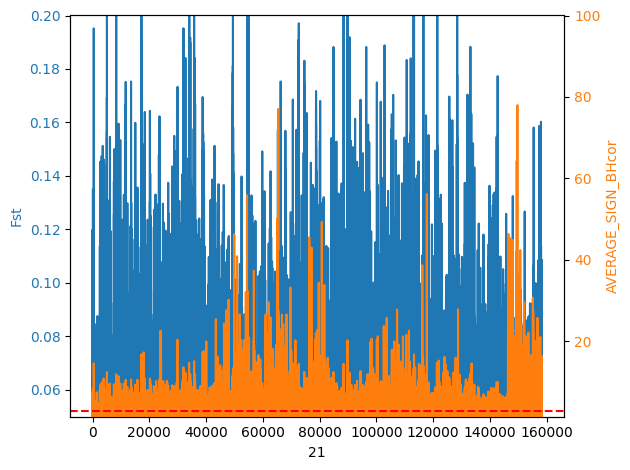

<Figure size 2000x2000 with 0 Axes>

In [210]:
data1 = sync_Sparus_fst_df["Fst"]
data2 = sync_Sparus_fst_df["FET_AVG_BHcor"]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel(str(CHR) )
ax1.set_ylabel('Fst', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0.05 , 0.2)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('AVERAGE_SIGN_BHcor', color=color) 
ax2.plot(data2, color=color)
plt.axhline(3, color = 'red',linestyle='dashed' )
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(1.5, 100)

plt.figure(figsize=(20, 20))
fig.tight_layout() 
plt.savefig(rf'Sparus_popoolation_plot_LR5371{CHR}')
plt.show()

In [133]:
sync_Sparus_fst_df.to_csv(rf"LR5371{CHR}_Sparus_popoolation_result.csv", header=True, index=False, sep=",")